### Matt Sloane / ms9548
### Homework 6 - Assignment 1

In [3]:
# Import Common Modules

from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.tools.plotting import scatter_matrix

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")
    
s = json.load(open(os.getenv("PUIDATA")+'/fbb_matplotlibrc.json'))
pl.rcParams.update(s)   

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
# Import Energy Data (.csv file uploaded to PUIdata directory)
energy_Data = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA")+
                               "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

energy_Data.head(5)  # Display top 5 rows of dataframe

,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [5]:
energy_Data.columns   #dsiplay column names of dataframe

Index(['NYC Borough, Block, and Lot (BBL)', 'Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [6]:
# Download Manhattan MapPLUTO Data and place in PUIdata directory - code obtained from yx2278 (w/ modifications)

def getzip():
    '''
    Function to create separate "Manhattan" directory within PIUdata directory (line 1), download Manhattan
    MapPLUTO data (line 2), move the zip file to the new Manhattan subdirectory and unzip it (lines 3 and 4,
    respectively), and remove the zip file (line 5)
    '''
    
    os.system("mkdir " + os.getenv("PUIDATA")+"/Manhattan")
    os.system("curl -O https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip")
    os.system("mv " + "mn_mappluto_16v1.zip " + os.getenv("PUIDATA")+"/Manhattan")
    os.system("unzip " + os.getenv("PUIDATA") + "/Manhattan/" + "mn_mappluto_16v1.zip -d " + os.getenv("PUIDATA")+"/Manhattan")
    os.system("rm " + os.getenv("PUIDATA") + "/Manhattan/mn_mappluto_16v1.zip")

getzip()    # run function 

In [7]:
lot_Data = gp.GeoDataFrame.from_file(os.getenv("PUIDATA")+"/Manhattan/MNMapPLUTO.shp") # transform data to dataframe
lot_Data.columns # view dataframe columns

Index(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BBL', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'UnitsRe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77f9e7f278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f77f96a1a90>]], dtype=object)

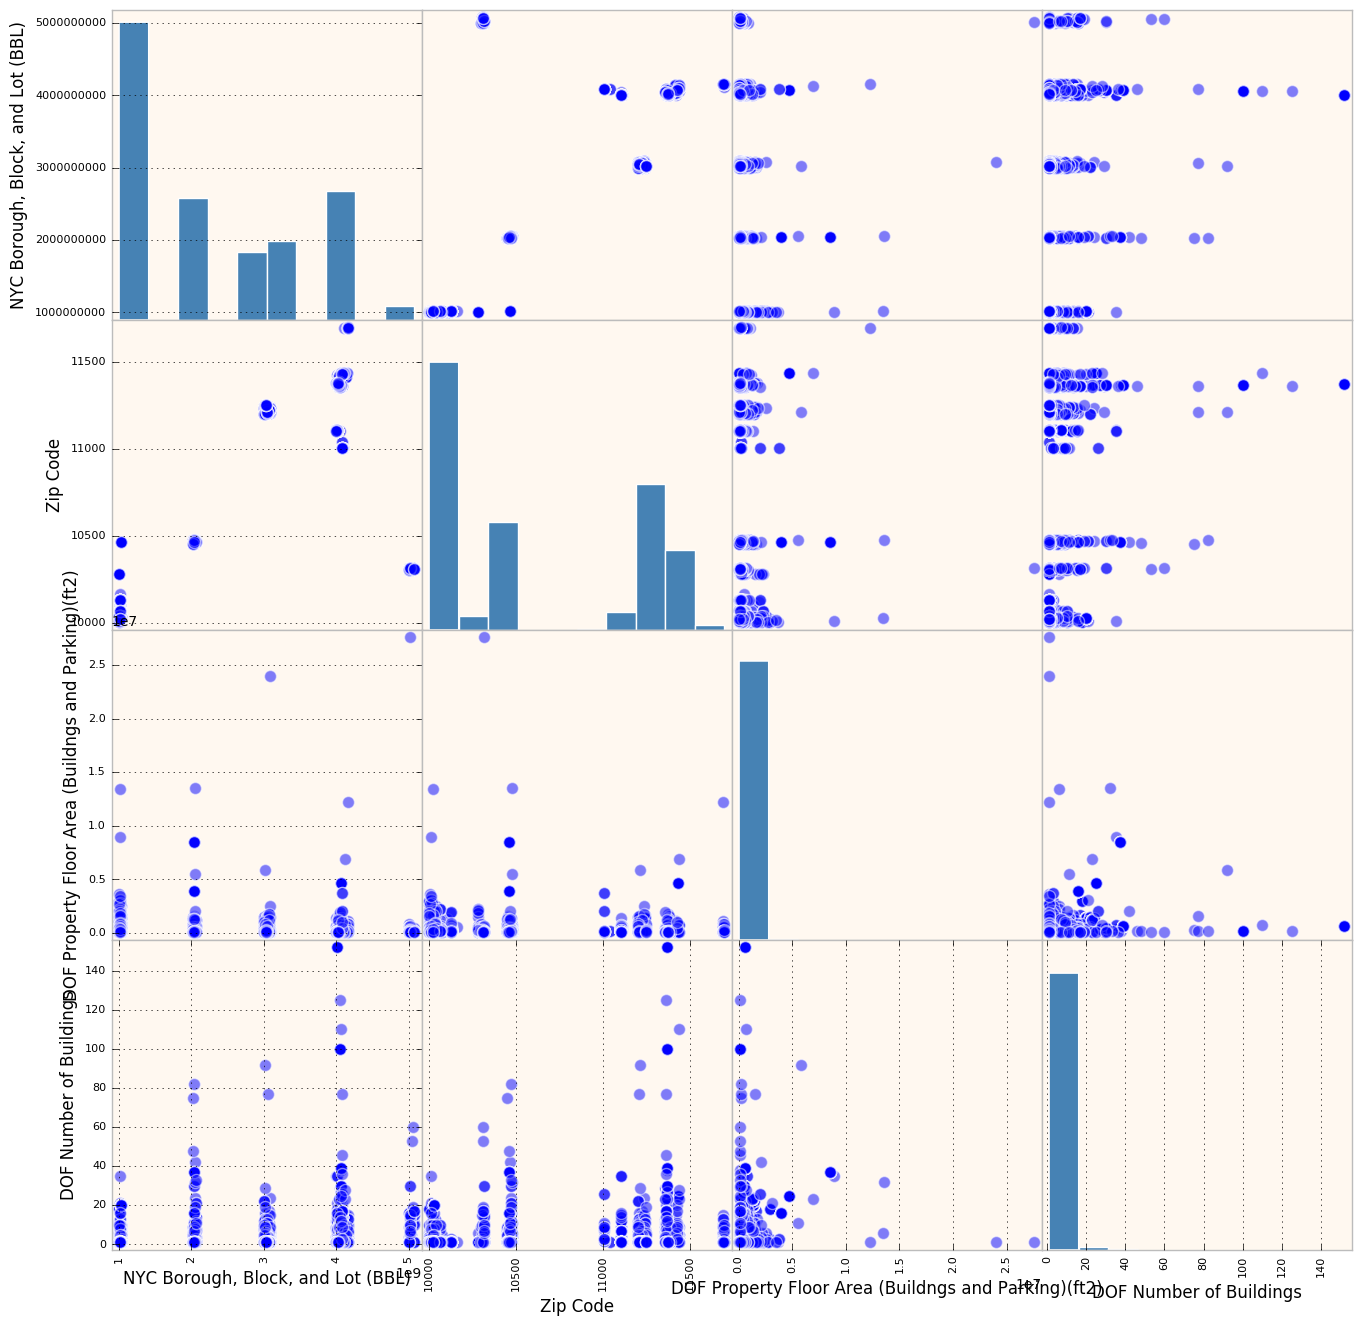

In [8]:
# Create Scatterplot Matrix of Energy Data
scatter_matrix (energy_Data, s=300, figsize=(16, 16))

#### The above represents a scatterplot matrix of the energy data dataframe (i.e., energy_Data), plotting various attributes of the data against each other in scatter plot form (when the same variable is plotted against eachother, a frequency histogram is generated instead).  This reveals relationship and trends in the data - a possible linear relationship is shown in the "Property Floor Area vs. Number of Buildings" scatter plot matrices.

In [9]:
# Converting select energy_Data columns to numeric format
energy_Data["Site EUI(kBtu/ft2)"] = pd.to_numeric(energy_Data["Site EUI(kBtu/ft2)"], errors="coerce")
energy_Data["Reported Property Floor Area (Building(s)) (ft²)"] = pd.to_numeric(energy_Data["Reported Property Floor Area (Building(s)) (ft²)"], 
                                                                        errors="coerce")

In [10]:
print (energy_Data['Site EUI(kBtu/ft2)'].astype(float))

Record Number
12086      NaN
14354      NaN
12150      NaN
12590      NaN
15591      NaN
12135      NaN
8523       NaN
15920      NaN
14241      NaN
15925      NaN
9685       NaN
7540       NaN
14360      NaN
10588      NaN
14423      NaN
12515      NaN
3028     125.4
14609      NaN
12096      NaN
6666       NaN
8914       NaN
11586      NaN
11714      NaN
14307      NaN
12761      NaN
12091      NaN
16027      NaN
13378      NaN
14911      NaN
15103      NaN
         ...  
14559      NaN
14560      NaN
14748      NaN
14753      NaN
13582      NaN
13947      NaN
14777      NaN
14779      NaN
14409      NaN
13262      NaN
13261      NaN
12523      NaN
12529      NaN
12536      NaN
13929      NaN
13944      NaN
13945      NaN
13821      NaN
13829      NaN
13837      NaN
13838      NaN
13847      NaN
14352      NaN
12976      NaN
12978      NaN
12984      NaN
12987      NaN
12988      NaN
13472      NaN
13482      NaN
Name: Site EUI(kBtu/ft2), dtype: float64


In [11]:
print (energy_Data["Reported Property Floor Area (Building(s)) (ft²)"].astype(float)) 

Record Number
12086    918919.0
14354         NaN
12150     64200.0
12590         NaN
15591     50000.0
12135     61800.0
8523     102198.0
15920     46620.0
14241         NaN
15925     54029.0
9685          0.0
7540     171502.0
14360         NaN
10588     68750.0
14423         NaN
12515         NaN
3028     330000.0
14609         NaN
12096     69160.0
6666      52974.0
8914      82200.0
11586     63360.0
11714     52960.0
14307         NaN
12761         NaN
12091    154754.0
16027    465667.0
13378         NaN
14911     68329.0
15103     66546.0
           ...   
14559         NaN
14560         NaN
14748         NaN
14753         NaN
13582         NaN
13947         NaN
14777         NaN
14779         NaN
14409         NaN
13262         NaN
13261         NaN
12523         NaN
12529         NaN
12536         NaN
13929         NaN
13944         NaN
13945         NaN
13821         NaN
13829         NaN
13837         NaN
13838         NaN
13847         NaN
14352         NaN
12976         

In [14]:
# Rename selected columns in datasets for subsequent data merge, drop unnecessary columns
energy_Data.rename(columns={"NYC Borough, Block, and Lot (BBL)": "BBL"}, inplace=True)
energy_Data.drop(energy_Data.columns[[1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,21,22,23]], axis=1, inplace=True)

# View colums
energy_Data.columns

Index(['BBL', 'Site EUI(kBtu/ft2)',
       'Reported Property Floor Area (Building(s)) (ft²)'],
      dtype='object')

In [15]:
# Drop unnecessary columns from lot_Data dataframe

lotData_reduct = lot_Data[[u'BBL',u'UnitsRes', u'UnitsTotal', u'ZoneMap', u'geometry']]

# View columns

lotData_reduct.columns

Index(['BBL', 'UnitsRes', 'UnitsTotal', 'ZoneMap', 'geometry'], dtype='object')

In [16]:
# Merge Dataframes

elot_Data = pd.merge(energy_Data, lotData_reduct, on=["BBL"])

# View merged dataframe

elot_Data.head(5)

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal,ZoneMap,geometry
0,1.006700e+09,NaN,NaN,0,1,8b,"POLYGON ((982544.9469999969 212642.9668000042,..."
1,1.004370e+09,NaN,NaN,0,4,12c,"POLYGON ((988632.9397999942 204610.9329999983,..."
2,1.013110e+09,125.4,330000.0,0,56,8c,"POLYGON ((993141.1744000018 216172.3948000073,..."
3,1.009220e+09,NaN,NaN,148,148,12c,"POLYGON ((989369.5851999968 206338.7575999945,..."
4,1.007400e+09,NaN,68329.0,0,1,8b,"POLYGON ((983418.6007999927 209632.8701999933,..."


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77f9e7e710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f77f8e69eb8>]], dtype=object)

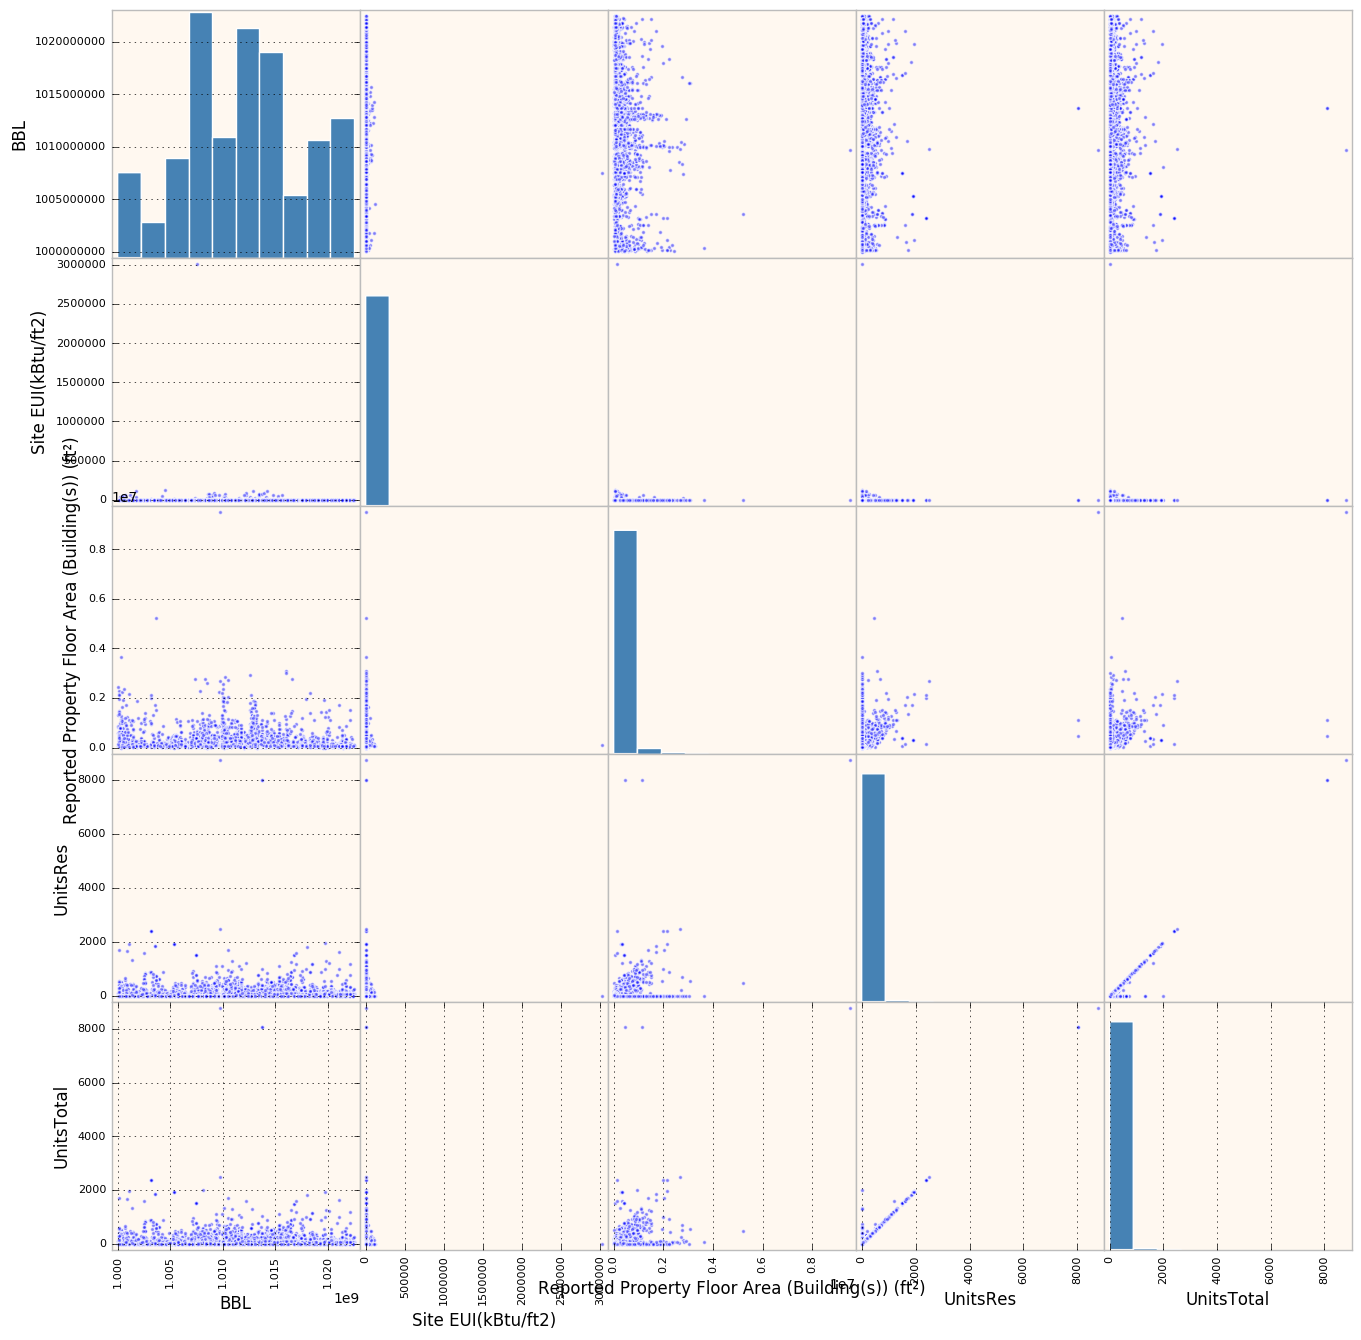

In [17]:
# Scatter Matrix of new dataframe
scatter_matrix (elot_Data, s=30, figsize=(16, 16))

#### The above represents a scatterplot matrix of the merged energy_Data lotData_reduct dataframes, plotting various attributes of the data against each other in scatter plot form (when the same variable is plotted against eachother, a frequency histogram is generated instead).  This reveals relationship and trends in the data - possible linear relationships are shown in the "Floor Area vs. Units Res" and "Floor Area vs. UnitsTotal" scatter plots, but thus seems obvious.

In [18]:
# Renaming energy and area dataframe columns from simplicity / clarity

elot_Data.rename(columns={"Site EUI(kBtu/ft2)":"Energy"
                           ,"Reported Property Floor Area (Building(s)) (ft²)":"Area"}, inplace=True)


elot_Data.head(5)

,BBL,Energy,Area,UnitsRes,UnitsTotal,ZoneMap,geometry
0,1.006700e+09,NaN,NaN,0,1,8b,"POLYGON ((982544.9469999969 212642.9668000042,..."
1,1.004370e+09,NaN,NaN,0,4,12c,"POLYGON ((988632.9397999942 204610.9329999983,..."
2,1.013110e+09,125.4,330000.0,0,56,8c,"POLYGON ((993141.1744000018 216172.3948000073,..."
3,1.009220e+09,NaN,NaN,148,148,12c,"POLYGON ((989369.5851999968 206338.7575999945,..."
4,1.007400e+09,NaN,68329.0,0,1,8b,"POLYGON ((983418.6007999927 209632.8701999933,..."


In [20]:
# Calculating total energy usage (TEU) per record by multiplying Energy and Area columns - list comprehension

elot_Data["TEU"] = elot_Data.apply(lambda x : float(x.Energy) * float(x.Area), axis=1)

elot_Data.head(5)

,BBL,Energy,Area,UnitsRes,UnitsTotal,ZoneMap,geometry,TEU
0,1.006700e+09,NaN,NaN,0,1,8b,"POLYGON ((982544.9469999969 212642.9668000042,...",NaN
1,1.004370e+09,NaN,NaN,0,4,12c,"POLYGON ((988632.9397999942 204610.9329999983,...",NaN
2,1.013110e+09,125.4,330000.0,0,56,8c,"POLYGON ((993141.1744000018 216172.3948000073,...",41382000.0
3,1.009220e+09,NaN,NaN,148,148,12c,"POLYGON ((989369.5851999968 206338.7575999945,...",NaN
4,1.007400e+09,NaN,68329.0,0,1,8b,"POLYGON ((983418.6007999927 209632.8701999933,...",NaN


In [22]:
# Remove null values in TEU column
elot_Data = elot_Data[~elot_Data.TEU.isnull()]

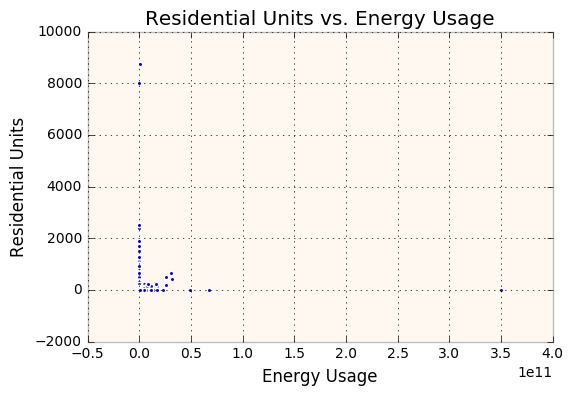

In [25]:
'''
From skeleton notebook: 
Make a scatter plot first of Energy vs Units. It will look really bad be cause all the datapoints are at very low 
Unit numbers while the Unit number range actually goes up to 8000.
'''

ax = elot_Data.plot.scatter(y="UnitsRes", x="TEU", s=10)
ax.set_xlabel("Energy Usage")
ax.set_ylabel("Residential Units")
ax.set_title("Residential Units vs. Energy Usage")
pl.show()



#### The above scatter plot plots the residential unit count (in the y-axis) versus the total energy usage (in the x-axis).  There is a noticeable clustering of units towards the smaller y- and x-value units, indicating a misleading scale.

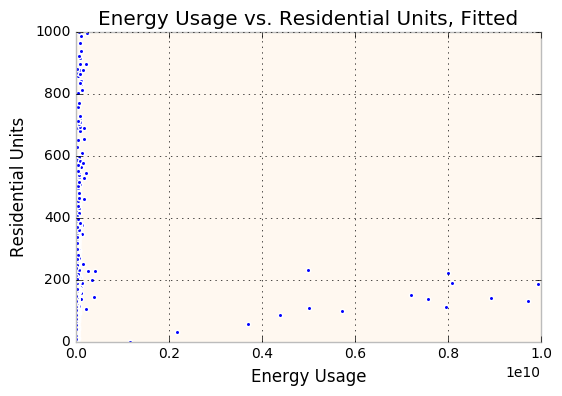

In [24]:
'''
From skeleton notebook: 
#Make a second plot that zooms into the region where most points are by cutting your x and y axis plotted: 
# e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly 
what you chose to plot.

Additionally, data is pared down here, to include only those records with energy usage greater than 1000 and with 
residential unit counts greater than 0.
'''

elot_Cut = elot_Data[(elot_Data.TEU > 1000) & (elot_Data.UnitsRes > 0)]
ax = elot_Cut.plot.scatter(y="UnitsRes", x="TEU", s=10)
ax.set_ylim(1,1000)
ax.set_xlim(1000,1e10)
ax.set_xlabel("Energy Usage")
ax.set_ylabel("Residential Units")
ax.set_title("Energy Usage vs. Residential Units, Fitted")
pl.show()

#### This scatterplot plots total residential units (y-axis) versus the total energy usage (x-axis) of the reduced dataframe in a more viewer friendly scale - allowing for a better view of the dispersion of the plot, particularly in energy usage among records with residential unit counts under 400.

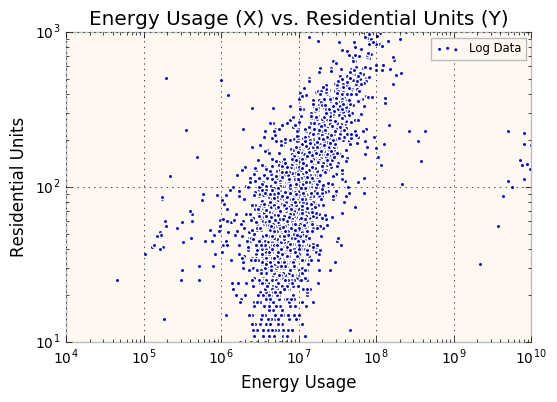

In [27]:
# Lot Plot: Energy Usage (X-axis) vs. Residential Units (Y-axis)
ax = elot_Cut.plot.scatter(y="UnitsRes", x="TEU", s=10, loglog=True, label = "Log Data")
ax.set_ylim(10,1000)
ax.set_xlim(1e4,1e10)
ax.set_xlabel("Energy Usage")
ax.set_ylabel("Residential Units")
ax.set_title("Energy Usage (X) vs. Residential Units (Y)")
pl.legend(loc='best', fontsize = 'small')
pl.show()

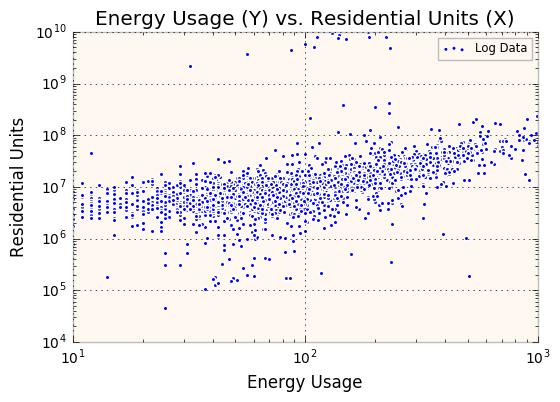

In [30]:
# Lot Plot: Energy Usage (Y-axis) vs. Residential Units (X-axis)
ax = elot_Cut.plot.scatter(y="TEU", x="UnitsRes", s=10, loglog=True, label = "Log Data")
ax.set_ylim(1e4,1e10)
ax.set_xlim(10,1000)
ax.set_xlabel("Energy Usage")
ax.set_ylabel("Residential Units")
ax.set_title("Energy Usage (Y) vs. Residential Units (X)")
pl.legend(loc='best', fontsize = 'small')
pl.show()

In [46]:
# Fit: Energy as dependent variable
x_const = sm.add_constant(np.log10(elot_Cut.UnitsRes))
model = sm.OLS(np.log10(elot_Cut.TEU), x_const, missing='drop') 
model_fit = model.fit()
m_predict = model_fit.predict()
y = np.log10(elot_Cut.TEU)
sigma = y / 2 
chisq = ((y - m_predict)**2 / sigma**2).sum()

print(model_fit.summary())

print("")
print ("The Chi-Sqaure statistic for energy consumption vs residential units is: {}".format(chisq))


                            OLS Regression Results                            
Dep. Variable:                    TEU   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1581.
Date:                Wed, 19 Oct 2016   Prob (F-statistic):          9.01e-286
Time:                        22:18:59   Log-Likelihood:                -1667.7
No. Observations:                3515   AIC:                             3339.
Df Residuals:                    3513   BIC:                             3352.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.7675      0.032    182.556      0.0

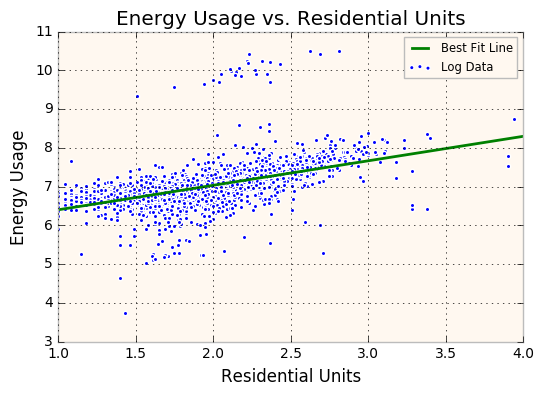

In [47]:
# Best Fit Line
pl.scatter(x = log10(elot_Cut.UnitsRes), y = log10(elot_Cut.TEU), s=10, label="Log Data")
x_line = np.linspace(1,4,1000)
x_fit = sm.add_constant(x_line)
pl.plot(x_line, model_fit.predict(x_fit), 'g-', label="Best Fit Line")
pl.xlim(1,4)
pl.xlabel("Residential Units")
pl.ylabel("Energy Usage")
pl.title("Energy Usage vs. Residential Units")
pl.legend(loc = 'best', fontsize = 'small')
pl.show()


In [48]:
# Fit: Residential Units as dependent variable
x_const = sm.add_constant(np.log10(elot_Cut.TEU))
model = sm.OLS(np.log10(elot_Cut.UnitsRes), x_const, missing='drop') 
model_fit = model.fit()
m_predict = model_fit.predict()
y = np.log10(elot_Cut.UnitsRes)
sigma = y / 2 
chisq = ((y - m_predict)**2 / sigma**2).sum()

print(model_fit.summary())

print("")
print ("The Chi-Sqaure statistic for energy consumption vs residential units is: {}".format(chisq))

                            OLS Regression Results                            
Dep. Variable:               UnitsRes   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1581.
Date:                Wed, 19 Oct 2016   Prob (F-statistic):          9.01e-286
Time:                        22:19:38   Log-Likelihood:                -1224.5
No. Observations:                3515   AIC:                             2453.
Df Residuals:                    3513   BIC:                             2465.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.4913      0.087    -17.220      0.0

#### Note:  I'm getting "infinity" (i.e., inf) as the chi square statistic, I'm not sure where the error is coming from.  Going forward, I'm assuming this chi-statistic is larger than the previous for energy as the dependent variable.

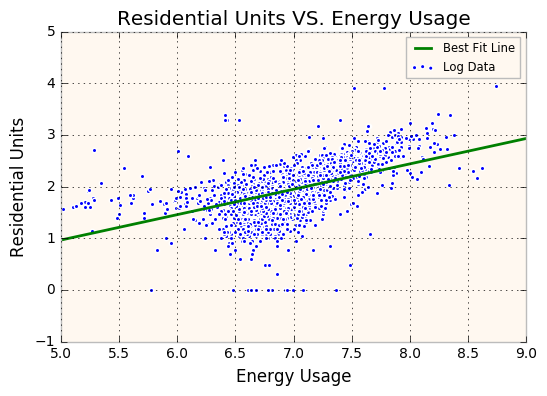

In [49]:
# Best Fit Line
pl.scatter(x = log10(elot_Cut.TEU), y = log10(elot_Cut.UnitsRes), s = 10, label="Log Data")
x_line = np.linspace(5,9,1000)
x_fit = sm.add_constant(x_line)
pl.plot(x_line, model_fit.predict(x_fit), 'g-', label="Best Fit Line")
pl.plot()
pl.ylabel("Residential Units")
pl.xlabel("Energy Usage")
pl.title("Residential Units VS. Energy Usage")
pl.legend(loc="best", fontsize = 'small')
plt.xlim(5,9)
pl.show()

#### Based on the chi-square test, Energy Usage as the independent variable is the better fit / use, as the chi-square calculation is smaller for that test (approximately 41.4 vs. infinity).

In [50]:
# Setup for polynomial fit 
df_poly = elot_Cut[["UnitsRes","TEU"]]
df_poly = df_poly.applymap(np.log10)
df_poly.head(5)

,UnitsRes,TEU
19,1.732394,6.950549
20,1.875061,6.811909
21,2.107210,6.860458
23,1.748188,6.919769
24,2.685742,10.415995


In [51]:
# Square independent variable value (UnitsRes)
df_poly['x2'] = df_poly.UnitsRes**2
df_poly.head(5)

,UnitsRes,TEU,x2
19,1.732394,6.950549,3.001188
20,1.875061,6.811909,3.515855
21,2.107210,6.860458,4.440334
23,1.748188,6.919769,3.056161
24,2.685742,10.415995,7.213209


In [53]:
# Establish polynomial equation: code from professor / lab / yx2278
poly = smf.ols(formula = 'TEU ~ x2 + UnitsRes', data=df_poly).fit()
poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TEU   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     964.5
Date:                Wed, 19 Oct 2016   Prob (F-statistic):               0.00
Time:                        22:24:42   Log-Likelihood:                -1551.3
No. Observations:                3515   AIC:                             3109.
Df Residuals:                    3512   BIC:                             3127.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7114      0.068     98.531      0.000         6.578     6.845
x2             0.2747      0.018     15.507      0.000         0.240     0.309
UnitsRes      -0.4117      0.069     -5.963      0.000        -0.547    -0.276
==============================================================================
Omnibus:                     2114.105   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107537.723
Skew:                           2.166   Prob(JB):                         0.00
Kurtosis:                      29.749   Cond. No.                         73.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

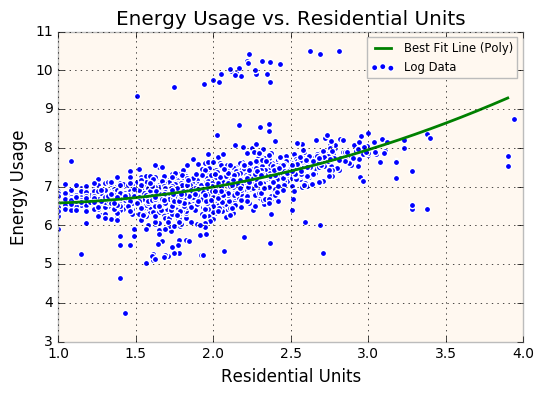

In [55]:
# Polynomial Fit Line (code from yx2278 used as reference)
pl.scatter(log10(elot_Cut.UnitsRes), log10(elot_Cut.TEU), label="Log Data")
df_new = pd.DataFrame()
df_new['UnitsRes'] = np.arange(log10(elot_Cut.UnitsRes).min(), log10(elot_Cut.UnitsRes).max(), 0.1)
df_new['x2'] = df_new['UnitsRes'] * df_new['UnitsRes']
pl.plot(df_new['UnitsRes'], poly.predict(df_new), 'g-', label="Best Fit Line (Poly)")
pl.plot()
pl.ylabel("Energy Usage")
pl.xlabel("Residential Units")
pl.title("Energy Usage vs. Residential Units")
plt.xlim([1,4])
pl.legend(loc="best", fontsize = 'small')
pl.show()


In [56]:
# Likelihood Ratio: -2 * (Linear Model Log Likelihood - Poly Model Log Likelihood) 

def lr (linear, poly):
    '''
    Calculates the Likelihood Ratio for provided log likelihoods
    '''
    
    return -2 * ((linear) - (poly))

linear_LL = -1667.7
poly_LL = -1551.3

print ('The likelihood ratio between the linear and poly function is: {}.'.format(lr(linear_LL, poly_LL)))

The likelihood ratio between the linear and poly function is: 232.80000000000018.


#### The critical value at 1 degree of freedom at a significance level of 0.05 is 3.84.  The likelihood ratio is much larger than this critical value, indicating significance.  Therefore, the null hypothesis can be rejected (i.e., the linear fit is the best prediction method for the dependent variable)